In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [43]:
df.shape

(545, 13)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [45]:
print(np.unique(df[['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']].values))

['furnished' 'no' 'semi-furnished' 'unfurnished' 'yes']


In [46]:
df.replace(['yes', 'no'],[1, 0], inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [47]:
df['furnishingstatus'].replace(['furnished', 'semi-furnished','unfurnished'],[3,2,1], inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,3


In [48]:
cor=df.corr()
cor

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


In [49]:
correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.8:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

In [50]:
print(cor.columns)
print('------')
print(correlated_features)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
------
set()


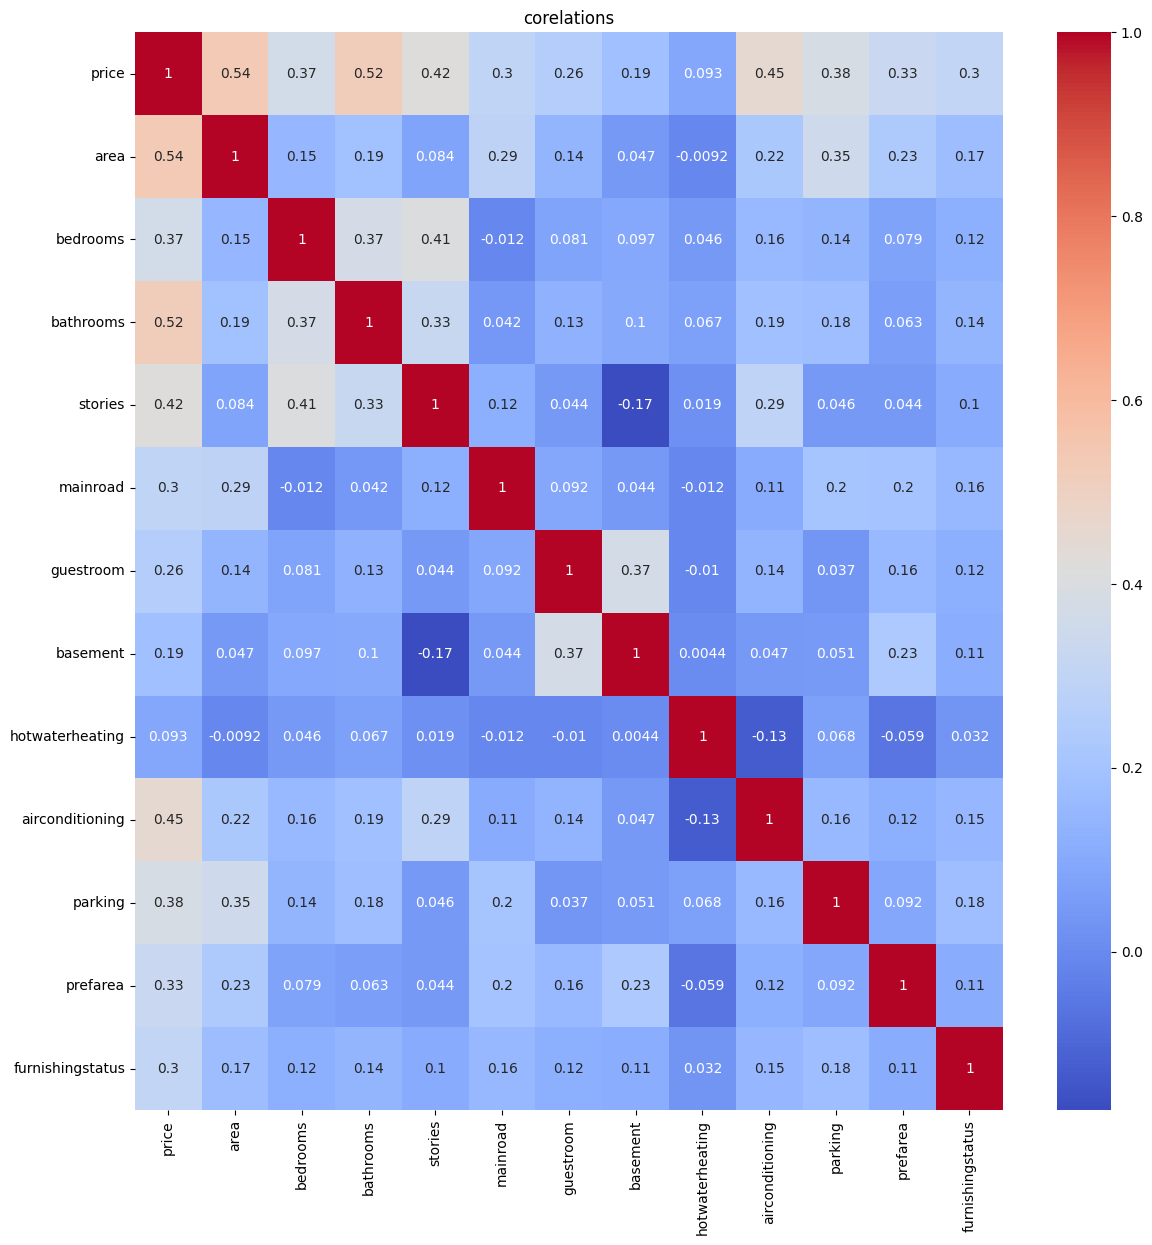

In [51]:
plt.figure(figsize=(14,14))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.title('corelations')
plt.show()          

In [52]:
x=df.drop('price',axis=1)
y=df['price']

In [54]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,3
1,8960,4,4,4,1,0,0,0,1,3,0,3
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,3
4,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,2
542,3620,2,1,1,1,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,3


In [55]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge


from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
x_train.shape , x_test.shape

((436, 12), (109, 12))

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
def build_model(X,y):
    X = sm.add_constant(X) # Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary())    # model summary
    return lm
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [65]:
lr=LinearRegression().fit(x_train,y_train)

In [66]:
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [67]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [71]:
lr.score(x_train,y_train)

0.6854429472843788

In [72]:
lr.score(x_test,y_test)

0.6494754192267804

In [73]:
y_train_pred

array([ 7141157.65285394,  6839782.3740179 ,  4850618.97604656,
        4023026.83117536,  3268832.99144208,  4169559.34089253,
        3292417.8686209 ,  2808521.10597779,  2361351.83466748,
        3608383.65720983,  4044862.28077749,  3715637.98315474,
        4727182.1137626 ,  3829937.10951761,  4219716.73605192,
        5910706.63226454,  2387786.91094429,  5819319.42192771,
        3362294.02213633,  7913712.4320323 ,  6511926.60492787,
        3302343.53087254,  5012984.57256475,  6858801.59270322,
        6479427.67874728,  3245248.11426327,  2390088.53344348,
        3131969.13819779,  5529084.78227902,  3073362.43915025,
        4054886.55304828,  2569353.48999402,  3941277.74363815,
        5178872.09816301,  4152177.0520072 ,  4035734.00584628,
        2459663.92112098,  6847272.35065355,  5117482.93709365,
        6620299.61070005,  6902502.10924828,  5409051.00920494,
        4416365.32144626,  3903943.33910387,  3805823.79342152,
        3274483.26291464,  7026416.47427

In [74]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [75]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,precision_score,recall_score,f1_score

In [76]:
print("training rmse",np.sqrt(mean_squared_error(y_train,y_train_pred)))
print("testing rmse",np.sqrt(mean_squared_error(y_test,y_test_pred)))                        

training rmse 984836.4426128389
testing rmse 1331071.4167895105


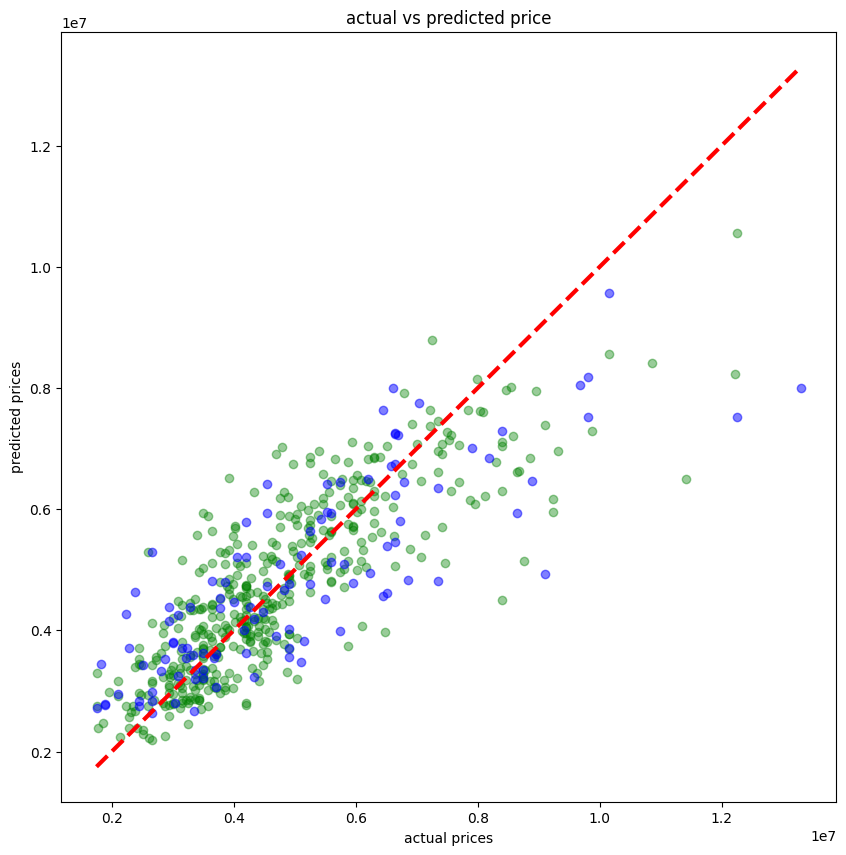

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(y_train,y_train_pred,alpha=0.4,color="green")
plt.scatter(y_test,y_test_pred,alpha=0.5,color="blue")
plt.plot([y.min(),y.max()], [y.min(),y.max()],'r--', lw=3)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title('actual vs predicted price')
plt.show()

Lasso Markdown

In [80]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lasso=Lasso(alpha=100)
lasso.fit(x_train,y_train)


Lasso(alpha=100)

In [81]:
y_train_pred_l=lasso.predict(x_train)
y_test_pred_l=lasso.predict(x_test)

In [84]:
print("Training rmse",np.sqrt(mean_squared_error(y_train,y_train_pred_l)))
print("Testing rmse",np.sqrt(mean_squared_error(y_test,y_test_pred_l)))
print("Trainin r2",r2_score(y_train,y_train_pred_l))
print("Testing r2",r2_score(y_test,y_test_pred_l))

Training rmse 984836.6893031754
Testing rmse 1331205.6509105044
Trainin r2 0.6854427896984254
Testing r2 0.6494047171879112


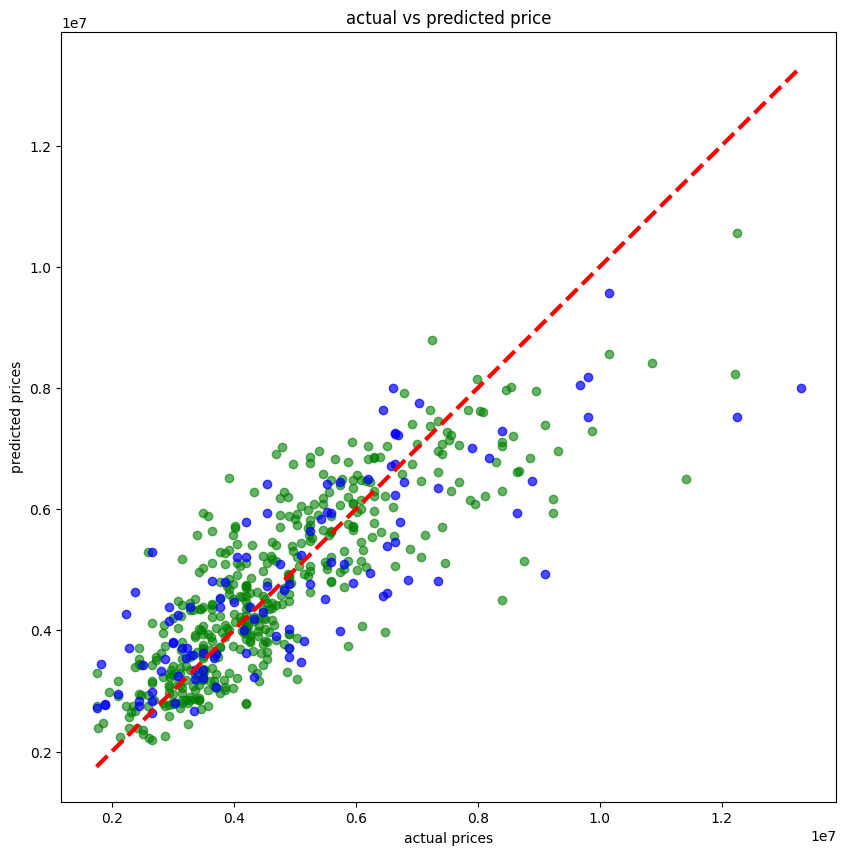

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(y_train,y_train_pred_l,alpha=0.6,color="green")
plt.scatter(y_test,y_test_pred_l,alpha=0.7,color="blue")
plt.plot([y.min(),y.max()], [y.min(),y.max()],'r--', lw=3)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title('actual vs predicted price')
plt.show()